In [1]:
# Import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [26]:
# Load cleaned dataset

df = pd.read_csv("cleaned_insurance_data.csv")

3. **Analyse univariée :** Analysez chaque variable indépendamment.

- Age

In [27]:
# Descriptive statistics

df['age'].describe()

# Minimum age = 18, Maximum age = 64, Average age = 39, Age standard deviation = ± 14

count    1326.000000
mean       39.207391
std        14.046767
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [28]:
# Descriptive statistics (Median)

df['age'].median() 

# Median age = 39

np.float64(39.0)

In [29]:
# Descriptive statistics (Median)

df['age'].mode() 

# The modal ages are 18 and 19, signifying a bimodal distribution 

0    18
1    19
Name: age, dtype: int64

In [31]:
# Descriptive statistics (Range)

age_range = df['age'].max() - df['age'].min()

age_range

# Range of the insured = 46

np.int64(46)

Text(64.72222222222221, 0.5, 'Frequency')

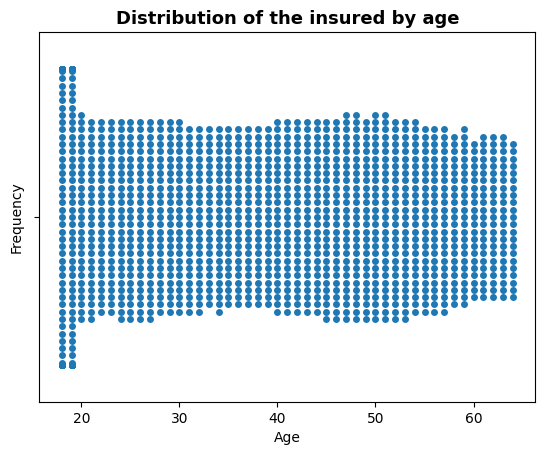

In [32]:
# Confirm bimodality with swarmplot

sns.swarmplot(data=df, x="age")
plt.title("Distribution of the insured by age", fontsize= 13, weight = "bold")
plt.xlabel("Age", weight = 10)
plt.ylabel("Frequency", weight = 10)

- Sex

In [35]:
# Number of males and females insured

number_of_insured_by_sex = df['sex'].value_counts()

number_of_insured_by_sex

# 668 males and 658 females are insured by the company

sex
1    668
0    658
Name: count, dtype: int64

In [ ]:
# Create dataframe for pie chart

pie_df = pd.DataFrame(number_of_insured_by_sex).reset_index()
pie_df['sex'] = pie_df['sex'].map({1 : "Male", 0 : "Female"})
pie_df['percentage'] = pie_df['count'] / pie_df['count'].sum() * 100

pie_df

,sex,count,percentage
0,Male,668,50.377074
1,Female,658,49.622926


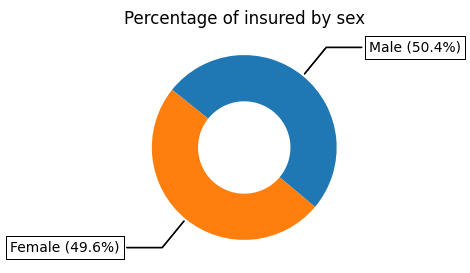

In [ ]:
# Pie chart showing the percentage ratio of males to females

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(pie_df['count'], wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(pie_df['sex'][i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

    label = f"{pie_df['sex'][i]} ({pie_df['percentage'][i]:.1f}%)"
    ax.annotate(
        label, 
        xy=(x, y), 
        xytext=(1.35 * np.sign(x), 1.4 * y),
        horizontalalignment=horizontalalignment, 
        **kw
    )

ax.set_title("Percentage of insured by sex")

plt.show()

# Males represent 50.4% of the insured while females represent 49.6% of the insured. 

- BMI

In [45]:
# Descriptive statistics

df['bmi'].describe()

# Minimum bmi = 16, Maximum bmi = 47.7, Average bmi = 30.6, bmi standard deviation = ± 6

count    1326.000000
mean       30.557640
std         5.973279
min        15.960000
25%        26.220000
50%        30.300000
75%        34.495000
max        47.740000
Name: bmi, dtype: float64

In [46]:
# Descriptive statistics (Median)

df['bmi'].median() 

# Median age = 30.3

np.float64(30.3)

In [47]:
# Descriptive statistics (Median)

df['bmi'].mode() 

# The modal BMI = 32.3, signifying a unimodal distribution 

0    32.3
Name: bmi, dtype: float64

Text(0.6944444444444446, 0.5, 'Frequency')

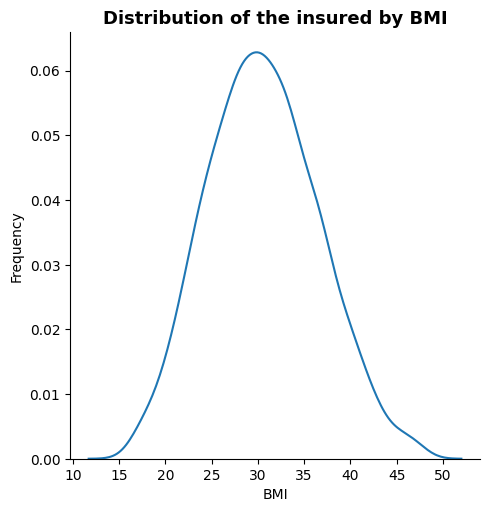

In [49]:
# Confirm unimodality with plot

sns.displot(df, x = 'bmi', kind='kde')
plt.title("Distribution of the insured by BMI", fontsize= 13, weight = "bold")
plt.xlabel("BMI", weight = 10)
plt.ylabel("Frequency", weight = 10)

- Children

In [52]:
number_of_children_by_insured = df['children'].value_counts()

number_of_children_by_insured

children
0    568
1    320
2    239
3    156
4     25
5     18
Name: count, dtype: int64

In [57]:
# Create dataframe for pie chart

pie_df_children = pd.DataFrame(number_of_children_by_insured).reset_index()
pie_df_children['percentage'] = round(pie_df_children['count'] / pie_df_children['count'].sum() * 100, 2)

pie_df_children

,children,count,percentage
0,0,568,42.84
1,1,320,24.13
2,2,239,18.02
3,3,156,11.76
4,4,25,1.89
5,5,18,1.36


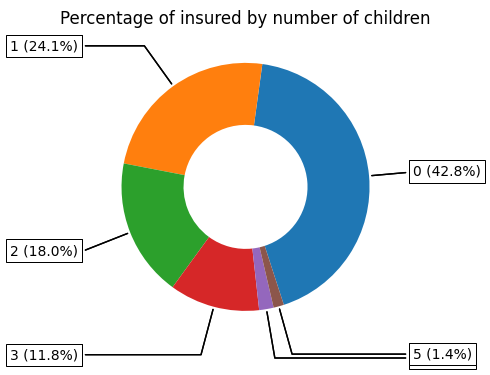

In [72]:
# Pie chart showing the percentage ratio of males to females

fig, ax = plt.subplots(figsize=(4, 7), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(pie_df_children['count'], wedgeprops=dict(width=0.5), startangle=-72)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(pie_df_children['children'][i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

    label = f"{pie_df_children['children'][i]} ({pie_df_children['percentage'][i]:.1f}%)"
    ax.annotate(
        label, 
        xy=(x, y), 
        xytext=(1.35 * np.sign(x), 1.4 * y),
        horizontalalignment=horizontalalignment, 
        **kw
    )

ax.set_title("Percentage of insured by number of children")

plt.show()

In [44]:
# Confirm the number of regions in dataset

df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

4. **Corrélation des variables :** Étudiez les corrélations avec la variable cible.
5. **Analyse bivariée :** Exemple : interaction entre sexe et fumeur.
6. **Visualisations graphiques :**
    - Utilisez des box plots ou violin plots (outil : `seaborn`).
7. **Validation des hypothèses :** Utilisez des tests statistiques.
8. **Visualisations :** Appuyez chaque point par des graphiques pertinents.